# Simple Logistic Regression(Binary Classification)

In [24]:
#Read Dataset
import pandas as pd

In [26]:
A = pd.read_csv("C:/Users/Admin/Downloads/Credit.csv")

In [27]:
#Drop Unnecessary columns
A = A.drop(labels=["Unnamed: 0","ID"],axis=1)

In [28]:
#Define X and Y
Y=A[["Gender"]]
X=A.drop(labels=["Gender"],axis=1)

In [30]:
#Missing data treatment and preprocessing
from ml_txt import replacer,data_prep
replacer(A)
Xnew=data_prep(X)

In [6]:
#Divide data into train and testing set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=25)

In [23]:
#Create ML model and calculate predictions
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)
pred_tr= model.predict(xtrain)
pred_ts= model.predict(xtest)

from sklearn.metrics import accuracy_score,confusion_matrix
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)
print("accuracy:",tr_acc,"\n:",ts_acc)

accuracy: 1.0 
: 0.9473684210526315


In [8]:
confusion_matrix(ytest,pred_ts)

array([[16, 21],
       [25, 18]], dtype=int64)

# Feature Selection in Logistic Regression

In [9]:
B = pd.read_csv("C:/Users/Admin/Downloads/Cars93.csv")


In [10]:
Q=[]
import re
for i in B.columns:
    Q.append(re.sub("[.]","",i))
B.columns=Q

In [11]:
B = B.drop(labels=["id","Make","Model"],axis=1)

In [12]:
Y = B[["Type"]]
X = B.drop(labels=["Type"],axis=1)

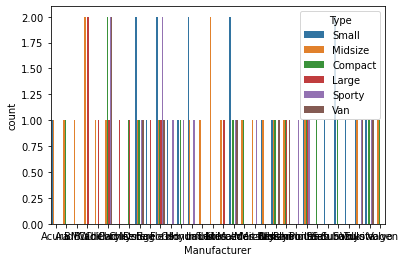

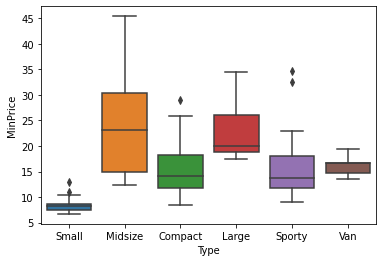

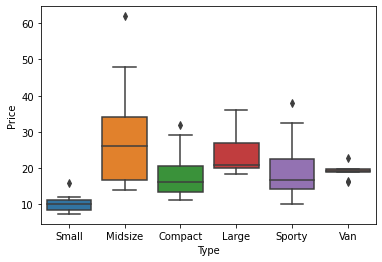

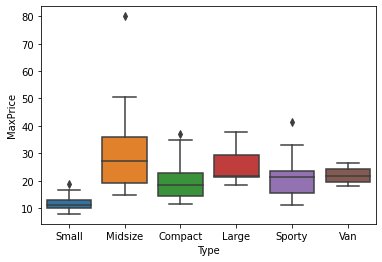

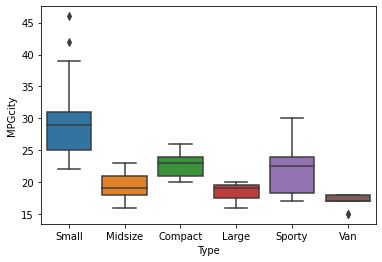

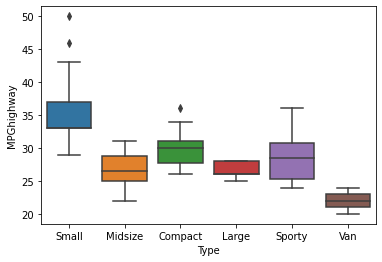

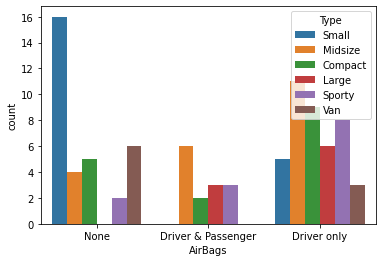

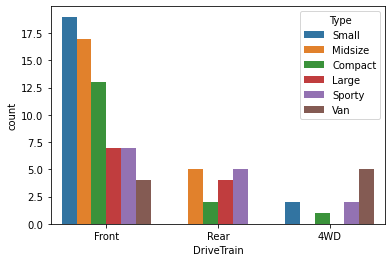

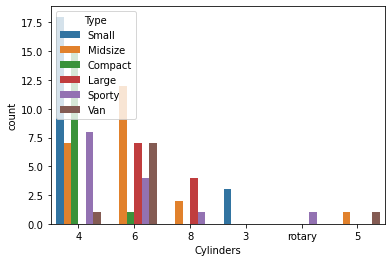

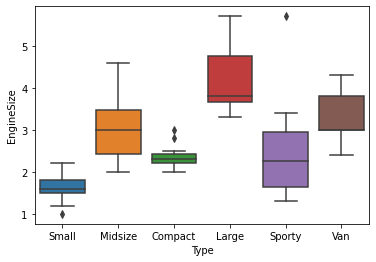

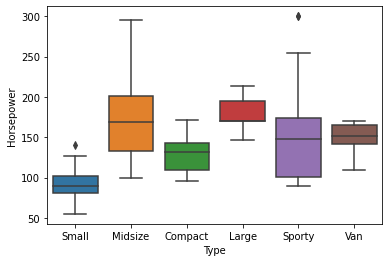

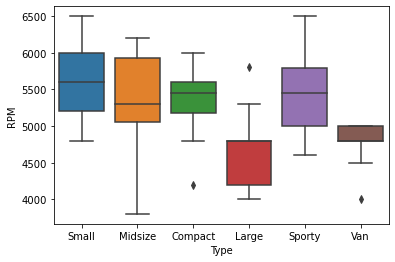

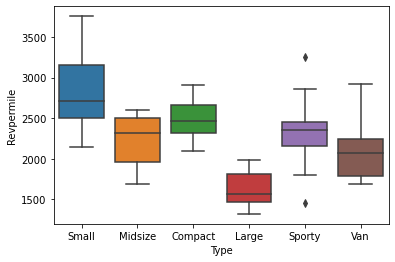

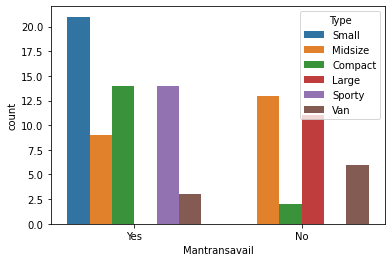

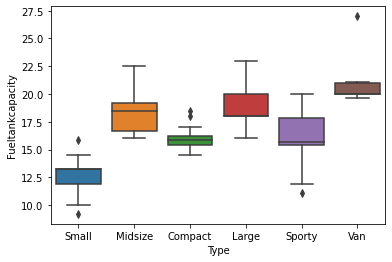

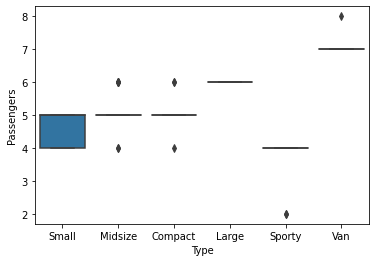

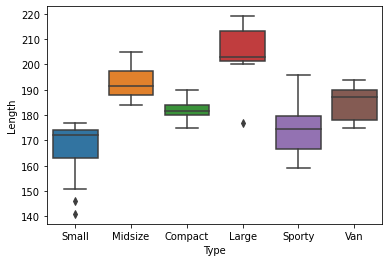

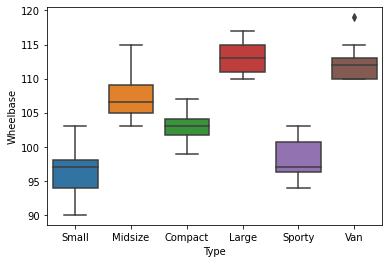

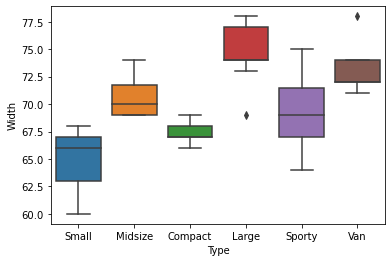

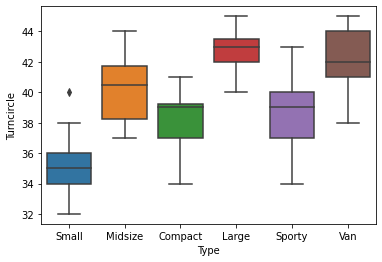

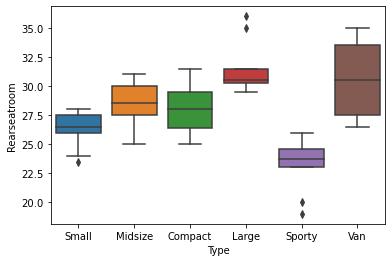

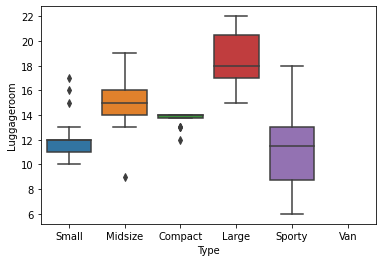

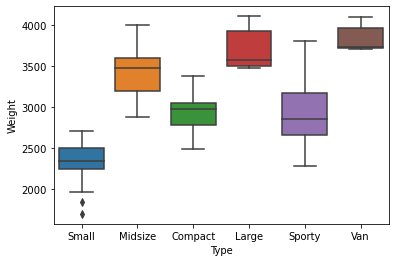

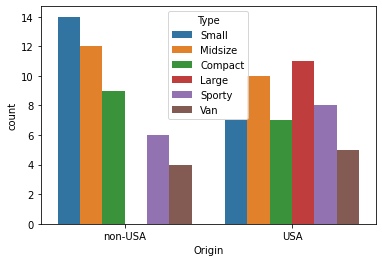

In [13]:
from warnings import filterwarnings
filterwarnings("ignore")
import seaborn as sb
import matplotlib.pyplot as plt
for i in X.columns:
    if(X[i].dtypes=="object"):
        sb.countplot(X[i],hue=Y.Type)
        plt.show()
    else:
        sb.boxplot(Y.Type,X[i])
        plt.show()

In [14]:
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,3)

In [15]:
imp_cols=[]
for i in X.columns:
    if(X[i].dtypes!="object"):
        x= ANOVA(B,"Type",i)
        if(x<0.05):
            print("Type vs:",i,"---",round(x,3))
            imp_cols.append(i)

Type vs: MinPrice --- 0.0
Type vs: Price --- 0.0
Type vs: MaxPrice --- 0.0
Type vs: MPGcity --- 0.0
Type vs: MPGhighway --- 0.0
Type vs: EngineSize --- 0.0
Type vs: Horsepower --- 0.0
Type vs: RPM --- 0.0
Type vs: Revpermile --- 0.0
Type vs: Fueltankcapacity --- 0.0
Type vs: Passengers --- 0.0
Type vs: Length --- 0.0
Type vs: Wheelbase --- 0.0
Type vs: Width --- 0.0
Type vs: Turncircle --- 0.0
Type vs: Rearseatroom --- 0.0
Type vs: Luggageroom --- 0.0
Type vs: Weight --- 0.0


In [16]:
imp_cols

['MinPrice',
 'Price',
 'MaxPrice',
 'MPGcity',
 'MPGhighway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Revpermile',
 'Fueltankcapacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turncircle',
 'Rearseatroom',
 'Luggageroom',
 'Weight']

In [17]:
from scipy.stats import chi2_contingency
def chisquare(df,cat1,cat2):
    import pandas as pd
    ct = pd.crosstab(df[cat1],df[cat2])
    a,b,c,d = chi2_contingency(ct)
    return b

In [18]:
for i in X.columns:
    if(X[i].dtypes=="object"):
        x = chisquare(B,"Type",i)
        if(x < 0.05):
            print("Type vs ",i,"-->",x)
            imp_cols.append(i)

Type vs  AirBags --> 0.0004854823787767891
Type vs  DriveTrain --> 0.00012480179759447616
Type vs  Cylinders --> 1.674244316924938e-07
Type vs  Mantransavail --> 3.661469229213669e-10
Type vs  Origin --> 0.015110051037674484


In [19]:
imp_cols

['MinPrice',
 'Price',
 'MaxPrice',
 'MPGcity',
 'MPGhighway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Revpermile',
 'Fueltankcapacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turncircle',
 'Rearseatroom',
 'Luggageroom',
 'Weight',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Mantransavail',
 'Origin']

In [20]:
from ml_txt import data_prep
Xnew = data_prep(X[imp_cols])

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)
pred_tr= model.predict(xtrain)
pred_ts= model.predict(xtest)

from sklearn.metrics import accuracy_score,confusion_matrix
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)
print("accuracy:",tr_acc,"\n:",ts_acc)

accuracy: 1.0 
: 0.9473684210526315
